In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Reading the file

In [2]:
df=pd.read_pickle('kmc_final.pkl')

In [3]:
df.head(3)

,ENTRYTYPE,ID,abstract,address,author,booktitle,department,editor,institution,journal,...,volume,year,pubmed_match,pubmed_closest,citation_title_only,pubmed,scopus_match,scopus_closest,cites,scopus
0,article,mu146768,Background: Platelet-rich plasma (PRP) has the...,NaN,Vivek Pandey and Sandesh S Madi and Lipisha Ag...,NaN,Radiology,NaN,NaN,Journal of Shoulder and Elbow Surgery,...,25,2016,100,Journal of shoulder and elbow surgery,1,True,100,Journal of Shoulder and Elbow Surgery,1,True
1,article,mu146799,A 55-year-old woman presented with a mucopurul...,NaN,Roumina Hasan and Sandeep Kumar and Anuradha C...,NaN,Radiology,NaN,NaN,Malaysian Journal of Medical Sciences,...,23,2016,95,The Malaysian journal of medical sciences,0,True,100,Malaysian Journal of Medical Sciences,0,True
2,article,mu145784,To measure the efficacy of educational program...,NaN,Suresh Sukumar and KV Rajagopal and KM Sabu an...,NaN,Radiology,NaN,NaN,International Journal of Pharma and Bio Sciences,...,7,2016,100,International journal of pharma and bio sciences,0,True,100,International Journal of Pharma and Bio Sciences,0,True


# Citations by year

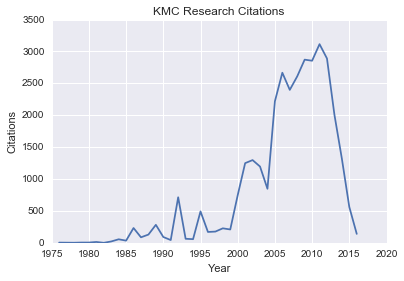

In [4]:
%matplotlib inline
plt.plot((df['cites'].groupby(df['year'])).sum())
plt.title('KMC Research Citations')
plt.xlabel('Year')
plt.ylabel('Citations')
#plt.savefig('test.png')
plt.show()

# Department-wise citations per year
Its a mess

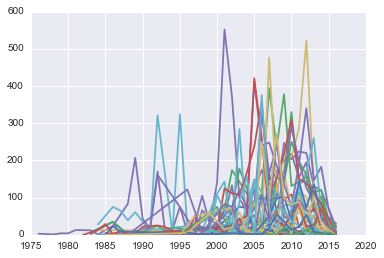

In [5]:
%matplotlib inline
for dep in np.unique(df['department']):
    a=df[df['department']==dep]['cites'].groupby(df['year']).sum()
    plt.plot(a)
#plt.legend(list(np.unique(df['department'])))
plt.show()

# Journal Index and Internal Factor


In [6]:
table = df.groupby(df['department'])['pubmed','scopus','cites'].sum()

In [7]:
table['impact'] = df.groupby('department')['cites'].mean()

# $impact = \frac{\sum citations}{\sum papers} $

In [8]:
table

,pubmed,scopus,cites,impact
department,,,,
Anaesthesiology,111.0,98.0,515,3.626761
Anatomy,179.0,195.0,2118,6.229412
Ayurveda,8.0,5.0,106,3.925926
Biochemistry,207.0,198.0,3589,9.941828
Cardiology,124.0,46.0,281,2.021583
Cardiovascular & Thoracic Surgery,27.0,27.0,118,3.470588
Clinical Psychology,2.0,2.0,26,8.666667
Community Medicine,155.0,140.0,1494,7.287805
Dermatology,120.0,131.0,578,3.247191


# Maximum cites of each dept

In [9]:
df.groupby('department')['cites'].max()

department
Anaesthesiology                           123
Anatomy                                   294
Ayurveda                                   53
Biochemistry                              226
Cardiology                                 29
Cardiovascular & Thoracic Surgery          28
Clinical Psychology                        19
Community Medicine                         97
Dermatology                                24
ENT                                        41
Forensic Medicine                          57
Gastroenterology                          142
Hospital Administration                     6
Immunohematology and Blood Transfusion     73
Medical Oncology                           10
Medicine                                  175
Microbiology                              294
Nephrology                                 17
Neuro Surgery                              40
Neurology                                  57
Nuclear Medicine                            2
Obstetrics & Gynaecolog

# Top 3 journals of each dept

In [10]:
i ='Radiology'
for i in np.unique(df['department']):
    print
    print i.upper()
    print
    for title in df[df['department']==i].sort_values('cites').tail(3)['title'].values:
        print title


ANAESTHESIOLOGY

The effect of ephedrine on intubating conditions and haemodynamics during rapid tracheal intubation using propofol and rocuronium
Laryngeal mask airway and tracheal tube cuff pressures
in children: are clinical endpoints valuable for guiding
inflation?
Controlled comparison between betamethasone gel and lidocaine jelly applied over tracheal tube to reduce postoperative sore throat, cough, and hoarseness of voice

ANATOMY

Centella asiatica (L.) Leaf Extract Treatment During the Growth Spurt Period Enhances Hippocampal CA3 Neuronal Dendritic Arborization in Rats
Histological changes in the brain of Young fluoride-intoxicated rats
Psychological morbidity, sources of stress and coping strategies among undergraduate medical students of Nepal

AYURVEDA

Antarth, A Polyherbal Preparation Protects against the Doxorubicin-induced Toxicity without Compromising its Antineoplastic Activity
Effect of Triphala mouthwash on the caries status
Triphala, an ayurvedic rasayana drug, pr